In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
image_path = 'your_image.jpg'
image = Image.open(image_path).convert("RGB")

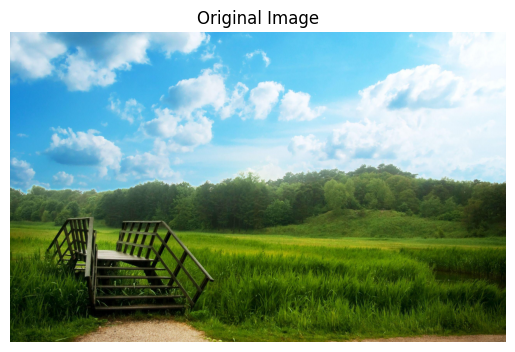

In [ ]:
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [ ]:
transform = transforms.ToTensor()
image_tensor = transform(image).to(device)
print(f"Image tensor shape: {image_tensor.shape}") # the Actual downlaoded size of the image is 2560x1600.

Image tensor shape: torch.Size([3, 1600, 2560])


In [ ]:
def flip_horizontal(tensor):
    return tensor.flip(-1) # flipping width

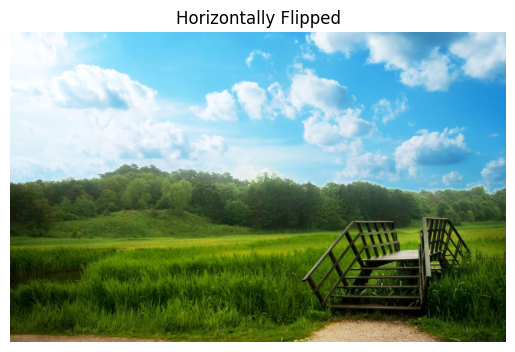

In [ ]:
flipped = flip_horizontal(image_tensor)
plt.imshow(flipped.permute(1,2,0).cpu())  # Convert to [H, W, C] for plotting which is the default requirement of Image manipulation libraries
plt.title("Horizontally Flipped")
plt.axis('off')
plt.show()

In [ ]:
def adjust_brightness(tensor, factor=1.2):
    out = tensor * factor # out -> adjusted brightness image
    return torch.clamp(out, 0, 1) # torch.clamp(input, min=None, max=None, *, out=None) → Tensor
                                  # Clamps all elements in input into the range [ min, max ].

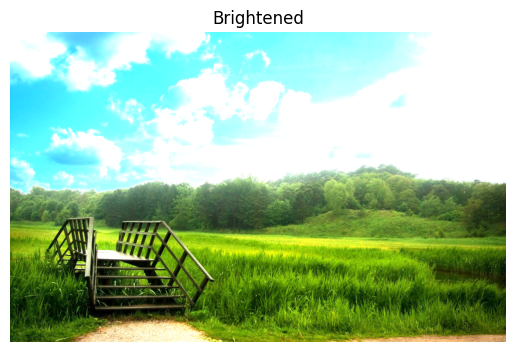

In [ ]:
bright = adjust_brightness(image_tensor, 1.5)
plt.imshow(bright.permute(1, 2, 0).cpu())
plt.title("Brightened")
plt.axis('off')
plt.show()

In [ ]:
def add_noise(tensor, noise_level=0.1):
    noise = torch.randn_like(tensor) * noise_level
    noisy = tensor + noise
    return torch.clamp(noisy, 0, 1)
# torch.randn_like() -> Returns a tensor with the same size as input that is filled with random numbers from a normal distribution with mean 0 and variance 1.

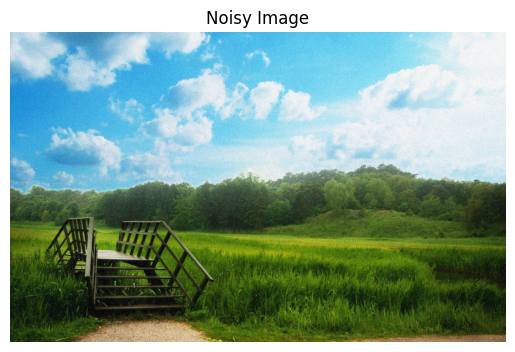

In [ ]:
noisy = add_noise(image_tensor, 0.1)
plt.imshow(noisy.permute(1, 2, 0).cpu())
plt.title("Noisy Image")
plt.axis('off')
plt.show()

In [ ]:
def to_grayscale(tensor):
    r, g, b = tensor[0], tensor[1], tensor[2]
    gray = 0.299 * r + 0.587 * g + 0.114 * b # this formula is used to convert to grayscale on basis of color percieving power of human eye
    return gray.unsqueeze(0).repeat(3, 1, 1)  # Repeat to make it 3 channels again

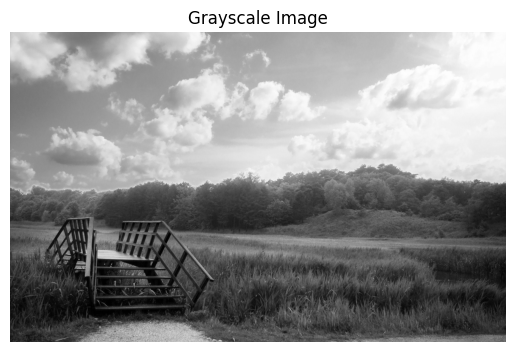

In [ ]:
grayScaled = to_grayscale(image_tensor)
plt.imshow(grayScaled.permute(1, 2, 0).cpu())
plt.title("Grayscale Image")
plt.axis('off')
plt.show()